**End-to-end Machine Learning project**

# Problem Statement

**Bank marketing campaigns often suffer from the 'Persistence Trap,' where excessive outreach efforts are directed at non-responsive leads, leading to operational waste and brand fatigue.**

**This project seeks to develop a prescriptive model that identifies the Optimal Contact Threshold the specific point of diminishing returns across diverse customer segments.**

**By predicting the minimum effort required for conversion, we want to recommend the best parameters needed to shift from a volume-based approach to an efficiency-first model.**

# Get the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/bank-full.csv")

## Take a Quick Look at the Data Structure

In [ ]:
df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [ ]:
new_cols = df['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].str.split(';', expand=True)

new_cols.columns = ['age', 'job','marital','education','default','balance','housing','loan','contact', 'day','month','duration','campaign','pdays','previous', 'poutcome','y']

bank = pd.concat([df, new_cols], axis=1)

bank = bank.drop('age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"', axis=1)

print(bank)


      age             job     marital    education default balance housing  \
0      58    "management"   "married"   "tertiary"    "no"    2143   "yes"   
1      44    "technician"    "single"  "secondary"    "no"      29   "yes"   
2      33  "entrepreneur"   "married"  "secondary"    "no"       2   "yes"   
3      47   "blue-collar"   "married"    "unknown"    "no"    1506   "yes"   
4      33       "unknown"    "single"    "unknown"    "no"       1    "no"   
...    ..             ...         ...          ...     ...     ...     ...   
45206  51    "technician"   "married"   "tertiary"    "no"     825    "no"   
45207  71       "retired"  "divorced"    "primary"    "no"    1729    "no"   
45208  72       "retired"   "married"  "secondary"    "no"    5715    "no"   
45209  57   "blue-collar"   "married"  "secondary"    "no"     668    "no"   
45210  37  "entrepreneur"   "married"  "secondary"    "no"    2971    "no"   

        loan      contact day  month duration campaign pdays pr

In [ ]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


In [ ]:
bank.dtypes

,0
age,object
job,object
marital,object
education,object
default,object
balance,object
housing,object
loan,object
contact,object
day,object


In [ ]:
# Defining numerical columns that should be int
# 'previous' is also typically numeric and should be handled here
num_cols_to_int = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for col in num_cols_to_int:
    # Use to_numeric with errors='coerce' to handle any initial non-numeric data
    # For 'previous', if there are NaNs from `errors='coerce'`, fill with 0 before converting to int
    if col == 'previous':
        bank[col] = pd.to_numeric(bank[col], errors='coerce').fillna(0).astype(int)
    else:
        bank[col] = pd.to_numeric(bank[col], errors='coerce').astype(int)

In [ ]:
bank = bank.rename(columns={"y": "term_deposit"})

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   day           45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      45211 non-null  object
 16  term_deposit  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
categorical_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','term_deposit']

for column in categorical_cols:
            print(f"\nColumn: {column}")
            print(bank[column].value_counts())


Column: job
job
"blue-collar"      9732
"management"       9458
"technician"       7597
"admin."           5171
"services"         4154
"retired"          2264
"self-employed"    1579
"entrepreneur"     1487
"unemployed"       1303
"housemaid"        1240
"student"           938
"unknown"           288
Name: count, dtype: int64

Column: marital
marital
"married"     27214
"single"      12790
"divorced"     5207
Name: count, dtype: int64

Column: education
education
"secondary"    23202
"tertiary"     13301
"primary"       6851
"unknown"       1857
Name: count, dtype: int64

Column: default
default
"no"     44396
"yes"      815
Name: count, dtype: int64

Column: housing
housing
"yes"    25130
"no"     20081
Name: count, dtype: int64

Column: loan
loan
"no"     37967
"yes"     7244
Name: count, dtype: int64

Column: contact
contact
"cellular"     29285
"unknown"      13020
"telephone"     2906
Name: count, dtype: int64

Column: month
month
"may"    13766
"jul"     6895
"aug"     6247
"j

In [ ]:
columns_with_unknown = ['job','education','contact','poutcome']

for col in columns_with_unknown:
  if '"unknown"' in bank[col].unique():
      bank[col] = bank[col].replace('"unknown"',np.nan)

for col in columns_with_unknown:
  print(f"\nColumn: {col}")
  print(bank[col].value_counts(dropna=False))


Column: job
job
"blue-collar"      9732
"management"       9458
"technician"       7597
"admin."           5171
"services"         4154
"retired"          2264
"self-employed"    1579
"entrepreneur"     1487
"unemployed"       1303
"housemaid"        1240
"student"           938
NaN                 288
Name: count, dtype: int64

Column: education
education
"secondary"    23202
"tertiary"     13301
"primary"       6851
NaN             1857
Name: count, dtype: int64

Column: contact
contact
"cellular"     29285
NaN            13020
"telephone"     2906
Name: count, dtype: int64

Column: poutcome
poutcome
NaN          36959
"failure"     4901
"other"       1840
"success"     1511
Name: count, dtype: int64


In [ ]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


The following cell is not shown either in the book. It creates the `images/end_to_end_project` folder (if it doesn't already exist), and it defines the `save_fig()` function which is used through this notebook to save the figures in high-res for the book.

In [ ]:
# extra code – code to save the figures as high-res PNGs for the book
from pathlib import Path

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Discover and Visualize the Data to Gain Insights

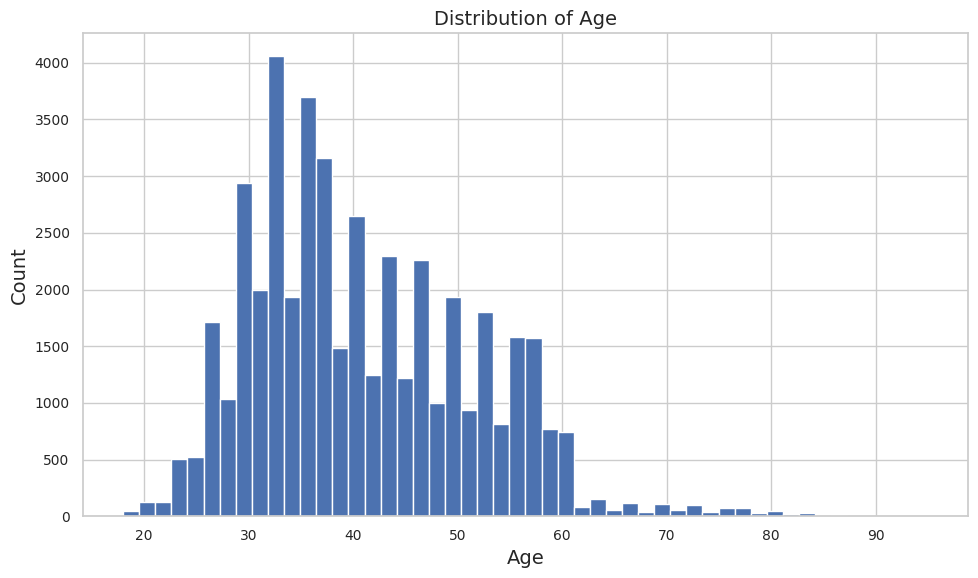

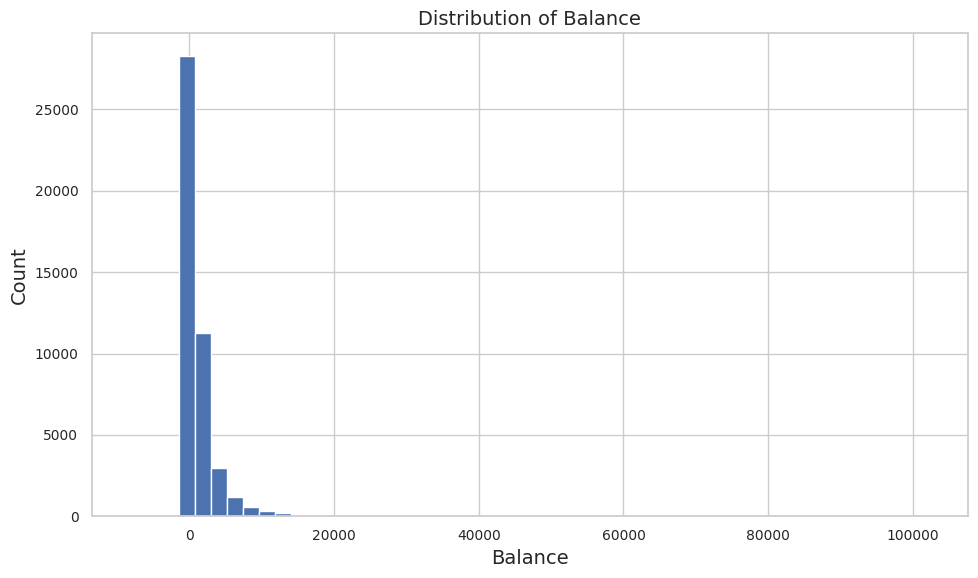

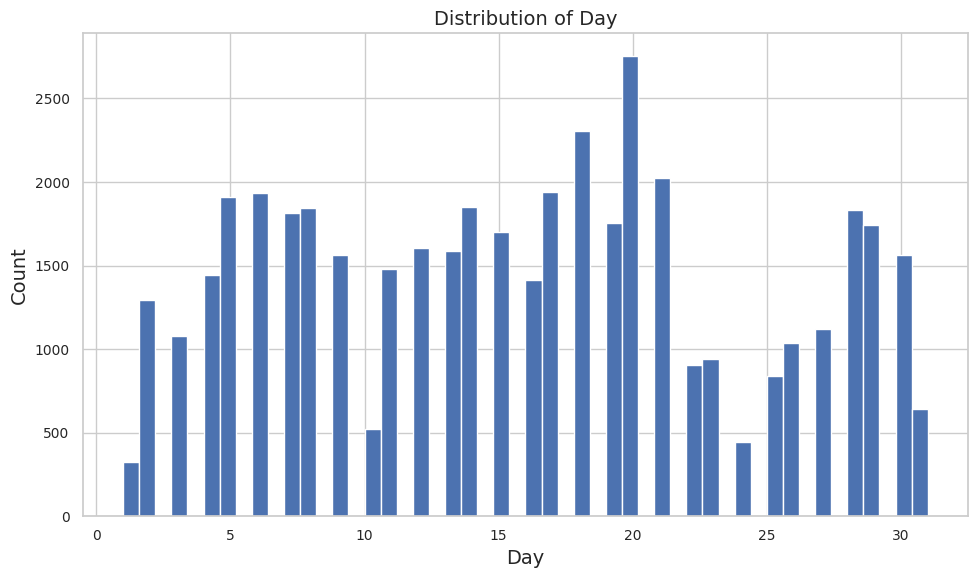

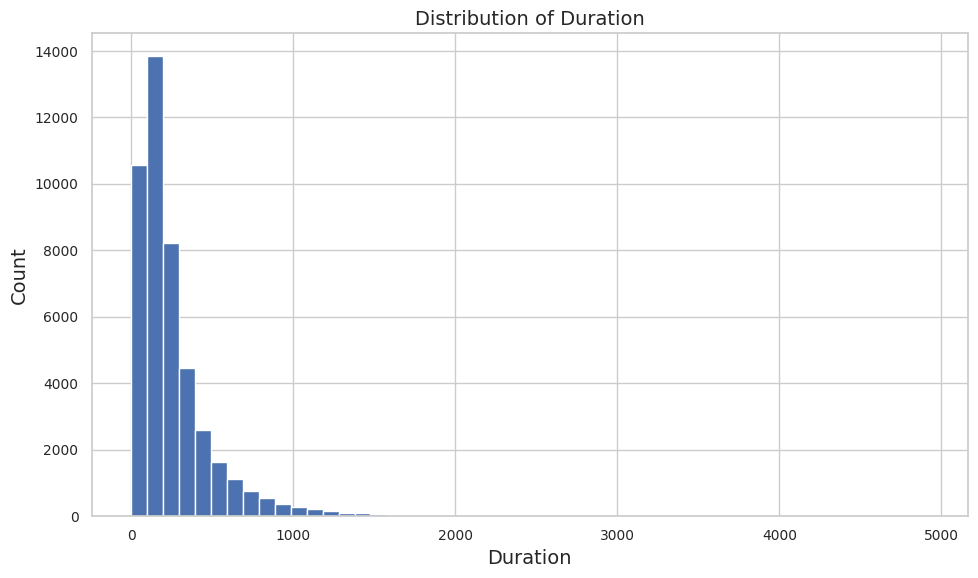

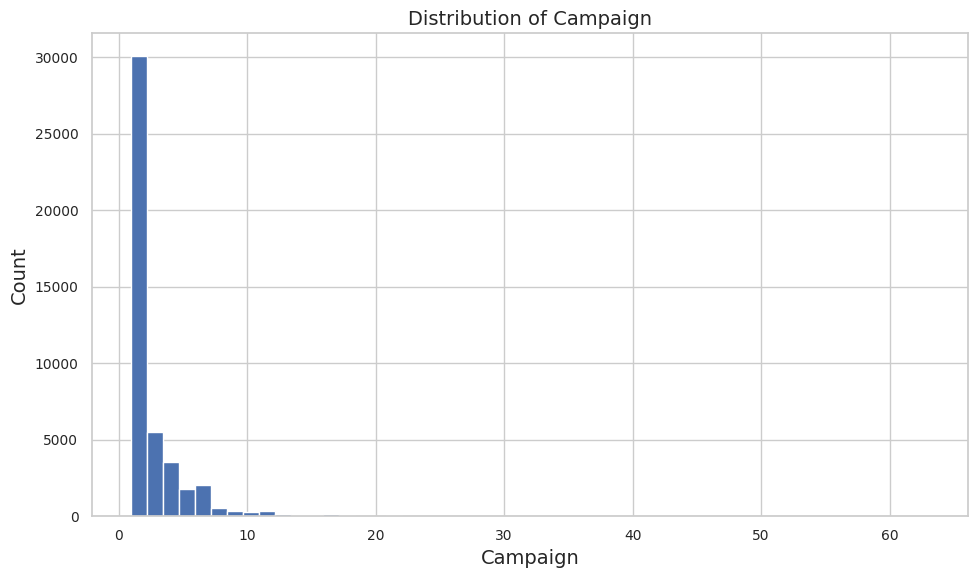

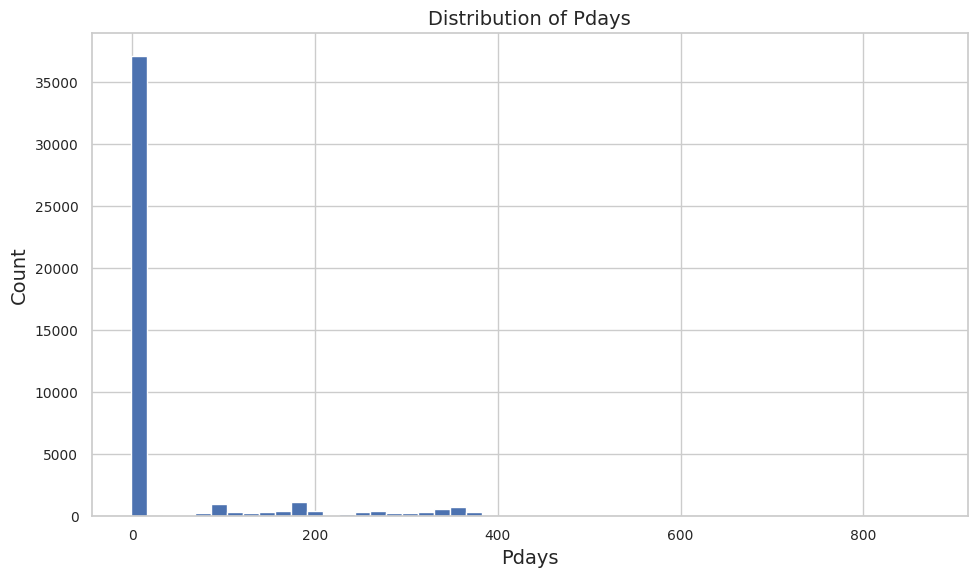

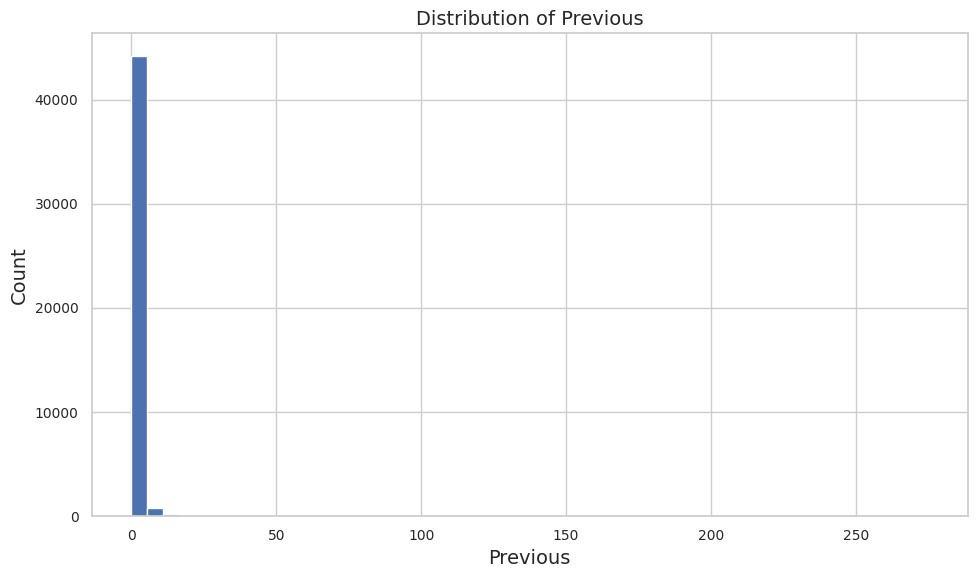

In [ ]:
import matplotlib.pyplot as plt

# Convert numerical columns to appropriate data types
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for col in numerical_cols:
    # Using errors='coerce' will turn any non-convertible values into NaN
    bank[col] = pd.to_numeric(bank[col], errors='coerce')

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Plot individual histograms for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    bank[col].hist(bins=50)
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel("Count")
    plt.title(f"Distribution of {col.replace('_', ' ').title()}")
    save_fig(f"bank_{col}_histogram")
    plt.show()

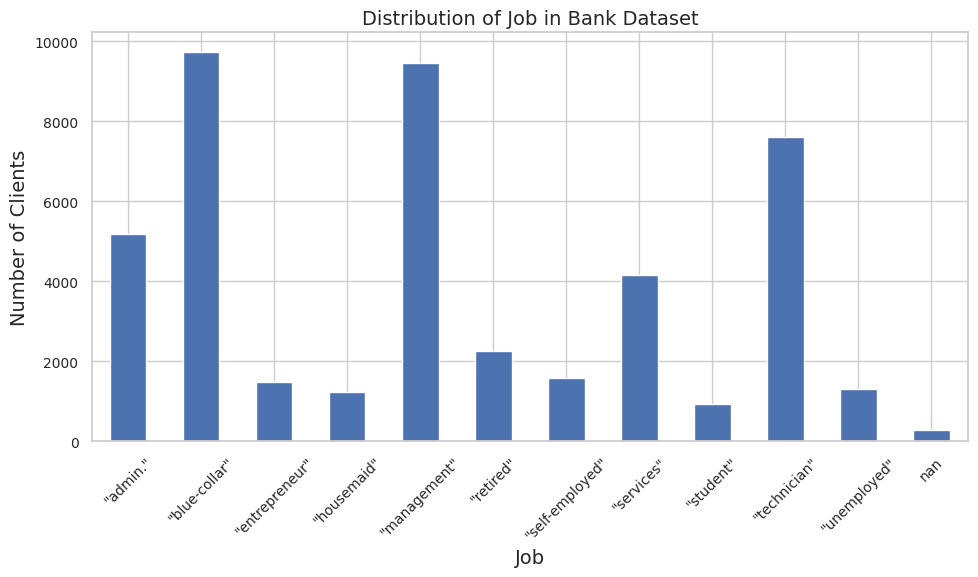

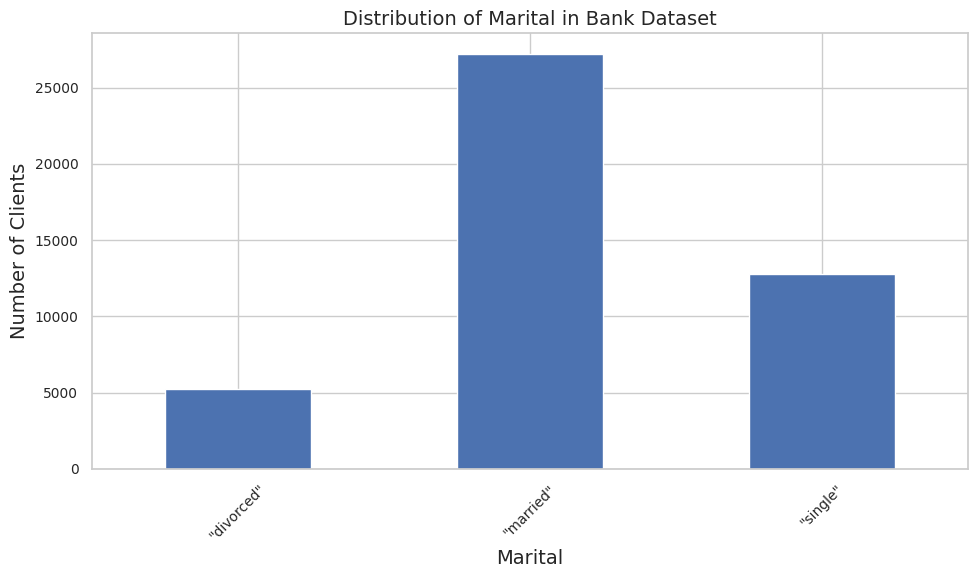

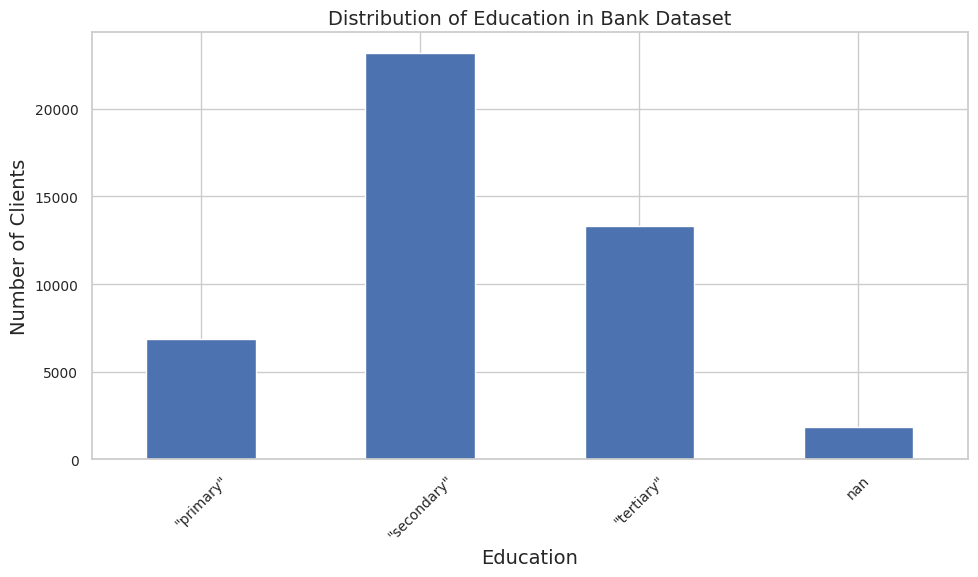

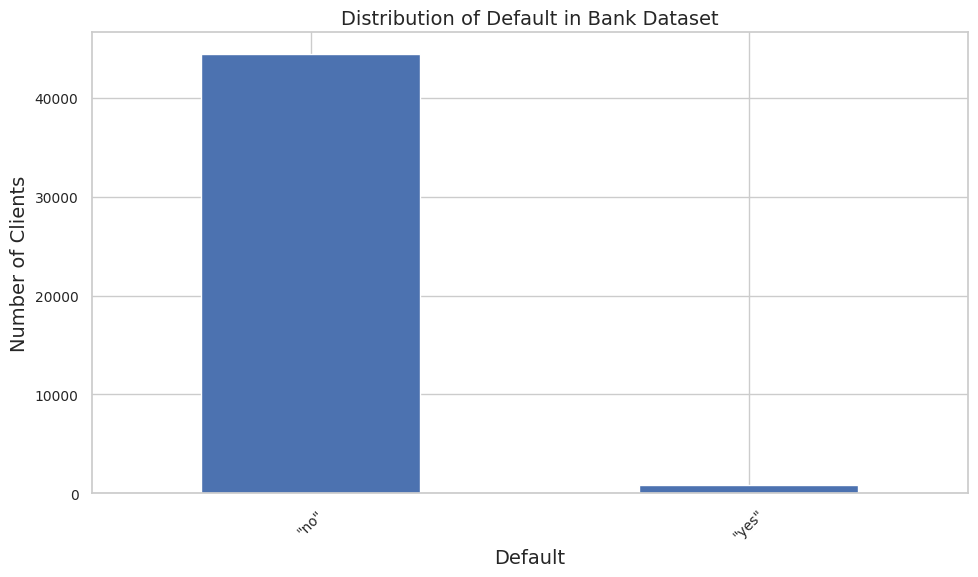

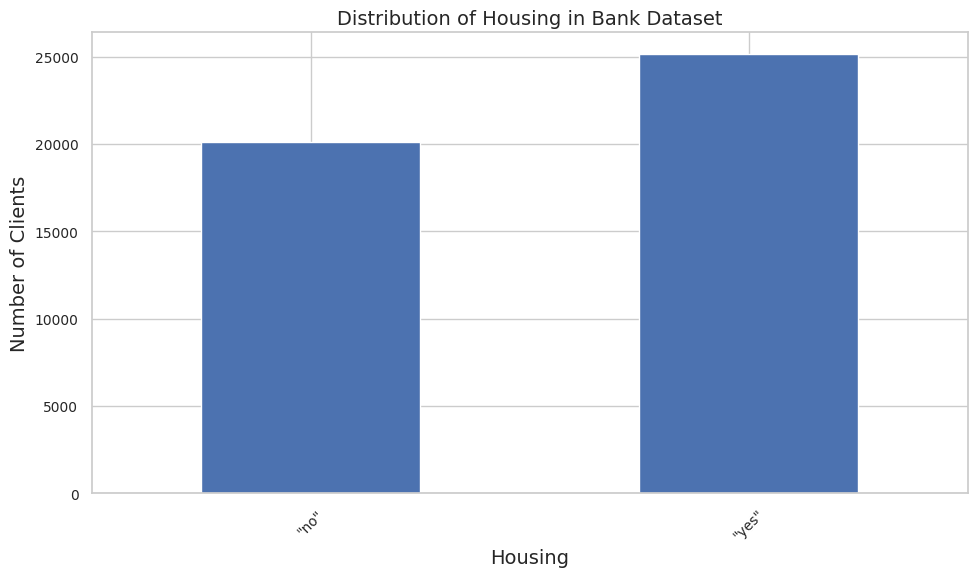

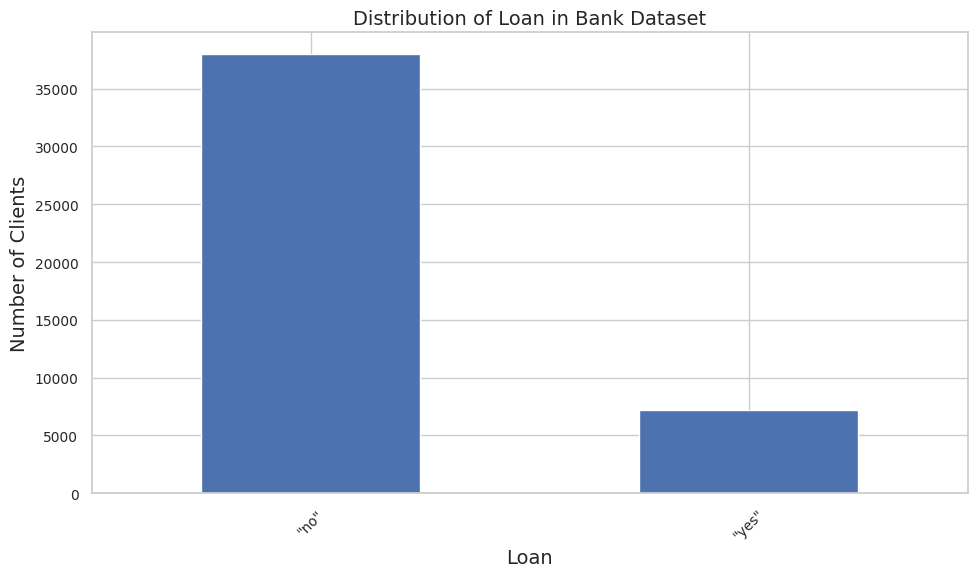

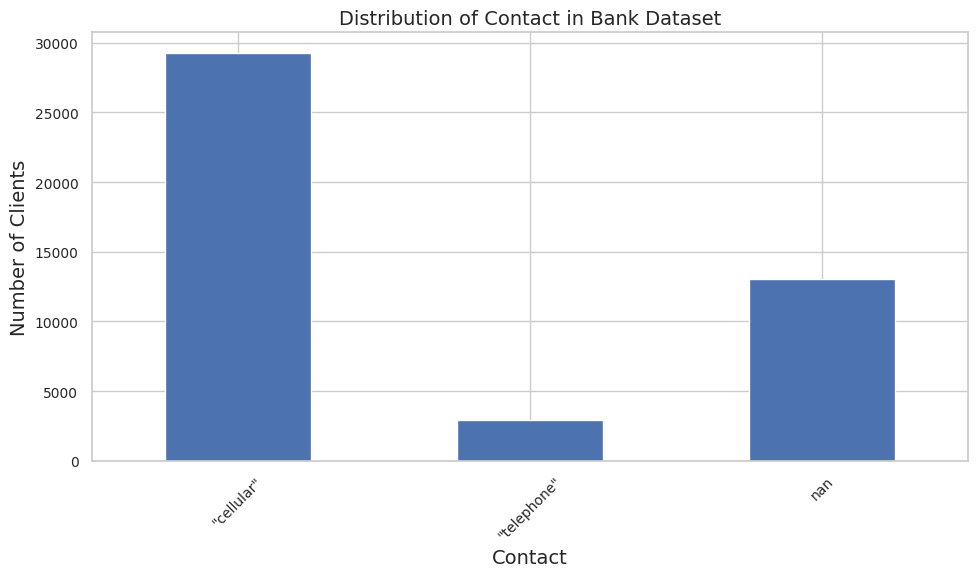

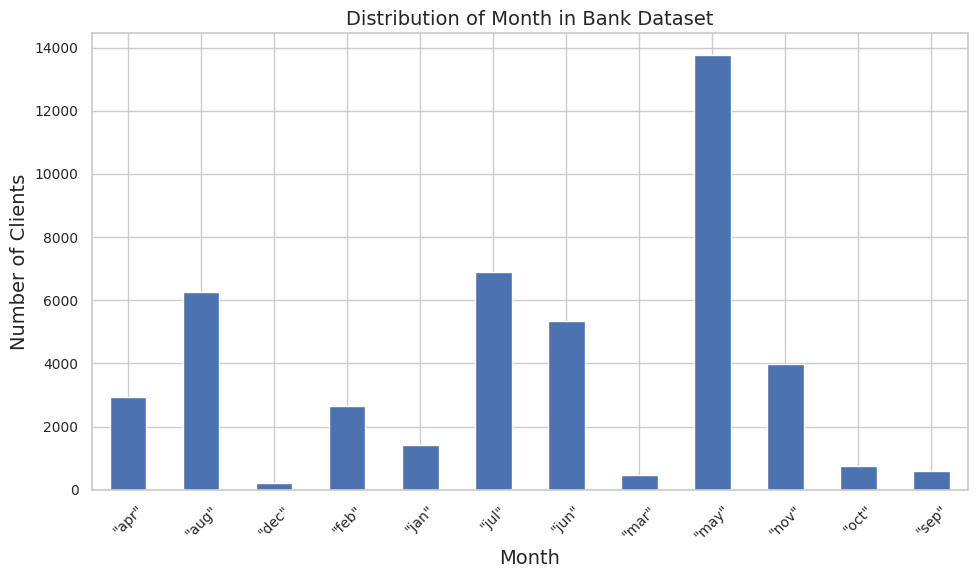

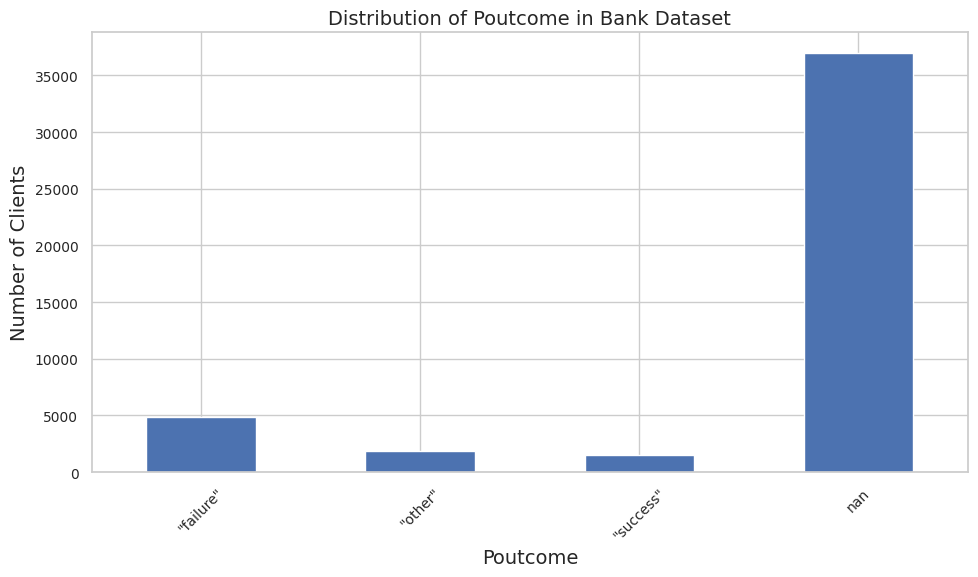

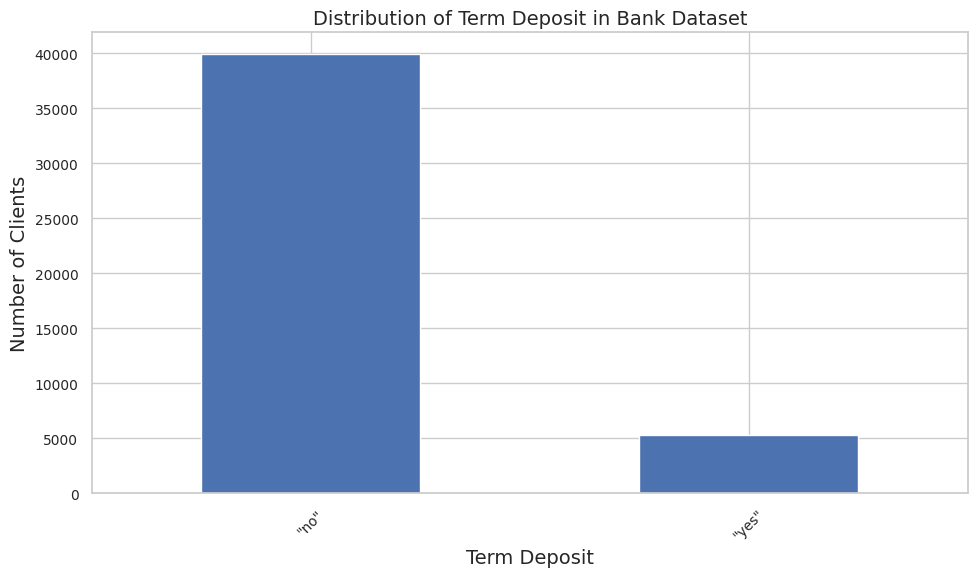

In [ ]:
# List of categorical columns identified previously
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'term_deposit']

for col in categorical_cols:
    # Check if the number of unique values is manageable for a bar plot
    if bank[col].nunique() <= 50:
        plt.figure(figsize=(10, 6))
        bank[col].value_counts(dropna=False).sort_index().plot.bar(rot=45, grid=True) # rotate for better label visibility
        plt.xlabel(col.replace('_', ' ').title()) # Clean up label for title
        plt.ylabel("Number of Clients")
        plt.title(f"Distribution of {col.replace('_', ' ').title()} in Bank Dataset")
        save_fig(f"bank_{col}_bar_plot")
        plt.show()
    else:
        print(f"Skipping bar plot for '{col}' as it has too many unique values ({bank[col].nunique()}).")

## Looking for Correlations

In [ ]:
corr_matrix = bank.corr(numeric_only=True)

In [ ]:
corr_matrix["campaign"].sort_values(ascending=False)

,campaign
campaign,1.000000
day,0.162490
age,0.004760
balance,-0.014578
previous,-0.032855
duration,-0.084570
pdays,-0.088628


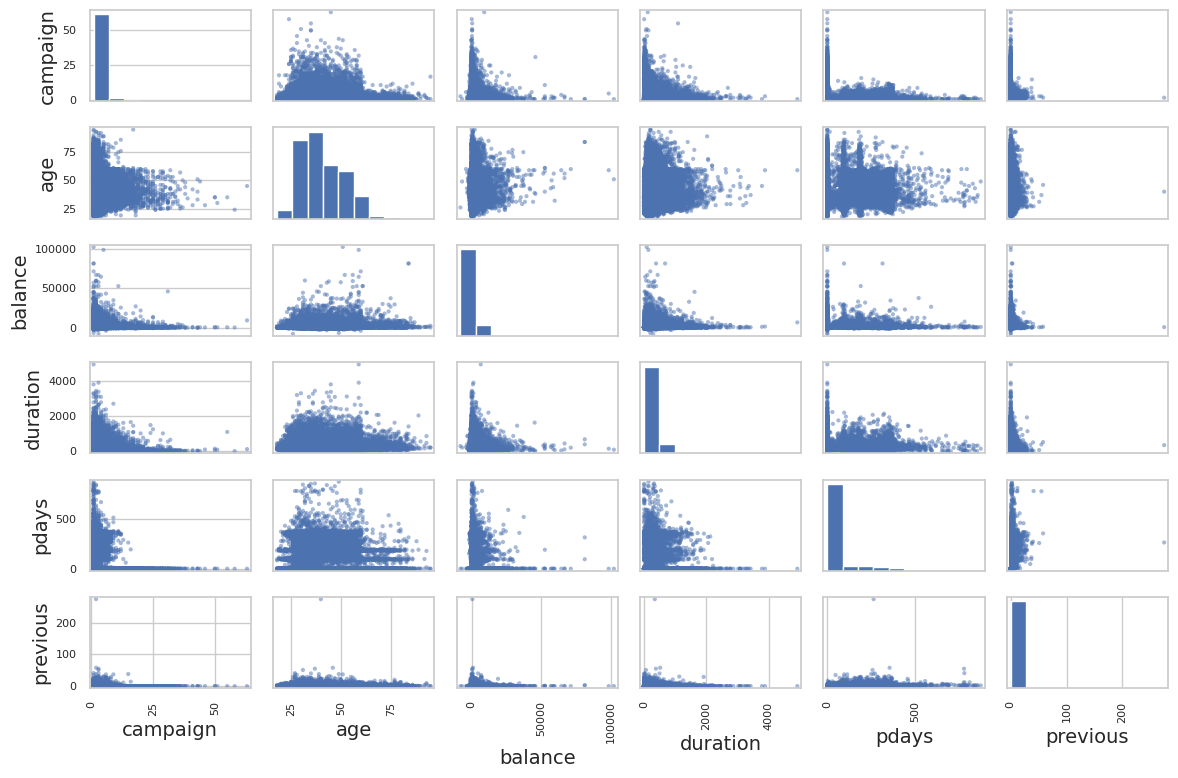

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Select numerical attributes relevant to the banking dataset
attributes = ["campaign", "age", "balance", "duration", "pdays", "previous"]

# Generate the scatter matrix using the banking DataFrame
scatter_matrix(bank[attributes], figsize=(12, 8))
save_fig("bank_scatter_matrix_plot")  # Save the figure
plt.show()


--- Analysis for: job ---
                     mean  median       std  count
job                                               
"technician"     2.906805     2.0  3.284196   7597
"management"     2.864348     2.0  3.203390   9458
"self-employed"  2.853072     2.0  3.186624   1579
"housemaid"      2.820968     2.0  2.800071   1240
"blue-collar"    2.816995     2.0  3.242741   9732
"entrepreneur"   2.799597     2.0  2.855926   1487
"services"       2.718344     2.0  3.044436   4154
"admin."         2.575324     2.0  2.950311   5171
"unemployed"     2.432080     2.0  2.633201   1303
"retired"        2.346731     2.0  2.269981   2264
"student"        2.299574     2.0  2.341865    938


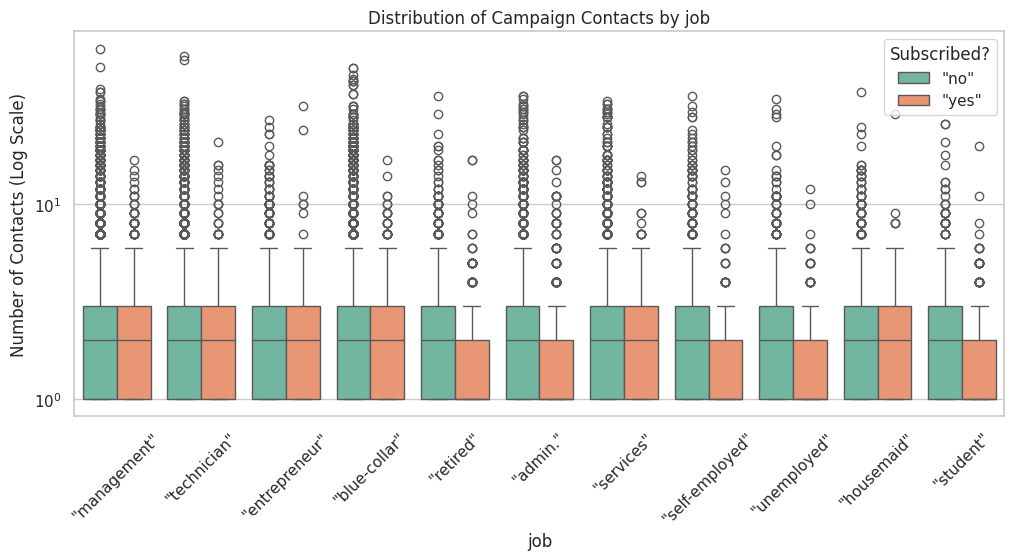

------------------------------

--- Analysis for: marital ---
                mean  median       std  count
marital                                      
"married"   2.842875     2.0  3.146143  27214
"single"    2.649805     2.0  3.106302  12790
"divorced"  2.630882     2.0  2.796826   5207


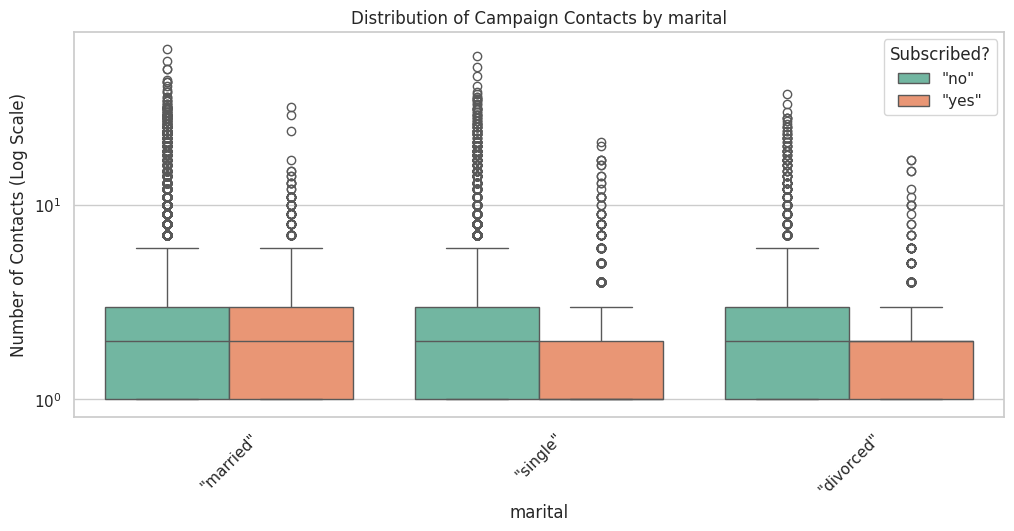

------------------------------

--- Analysis for: education ---
                 mean  median       std  count
education                                     
"primary"    2.834331     2.0  3.166683   6851
"tertiary"   2.825577     2.0  3.146753  13301
"secondary"  2.700802     2.0  2.985786  23202


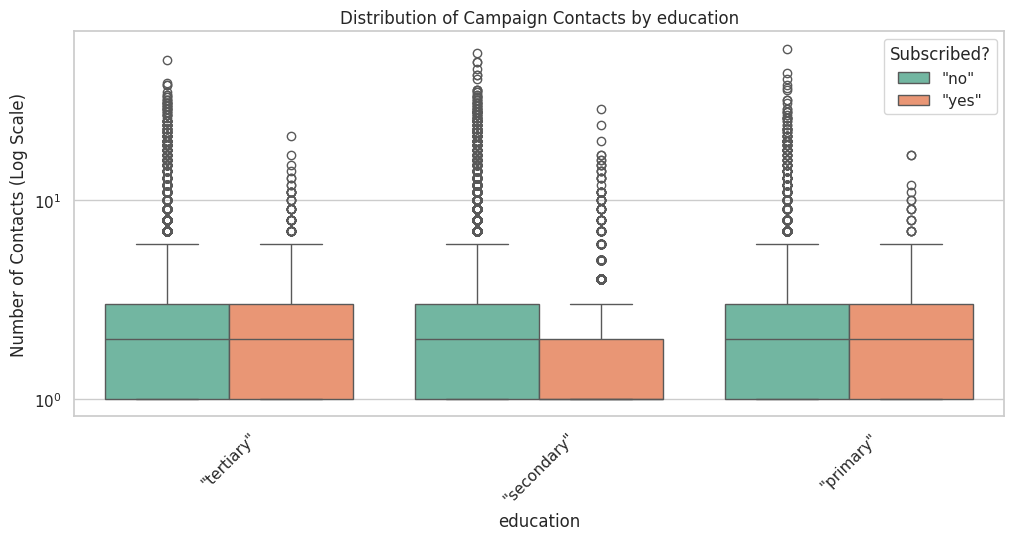

------------------------------

--- Analysis for: default ---
             mean  median       std  count
default                                   
"yes"    3.148466     2.0  3.628145    815
"no"     2.756780     2.0  3.087038  44396


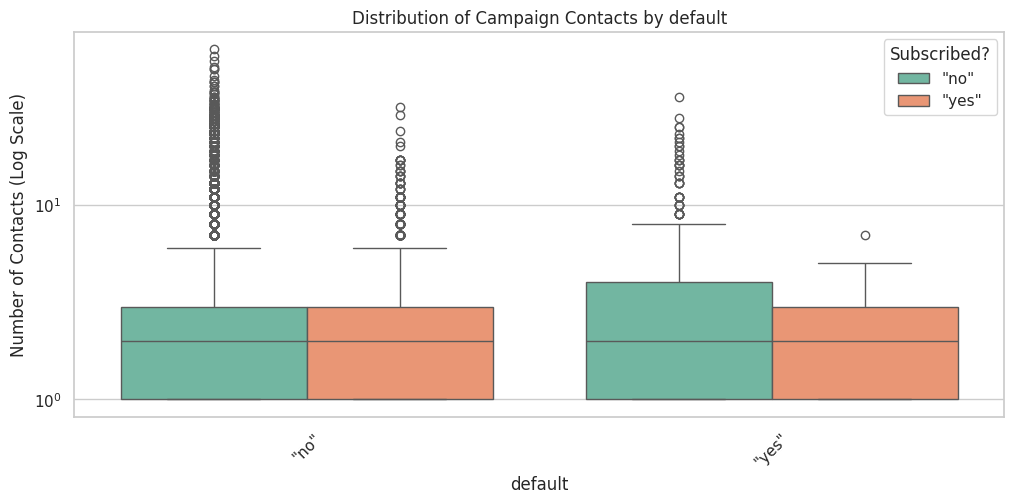

------------------------------

--- Analysis for: housing ---
             mean  median       std  count
housing                                   
"no"     2.845625     2.0  3.041508  20081
"yes"    2.698488     2.0  3.140979  25130


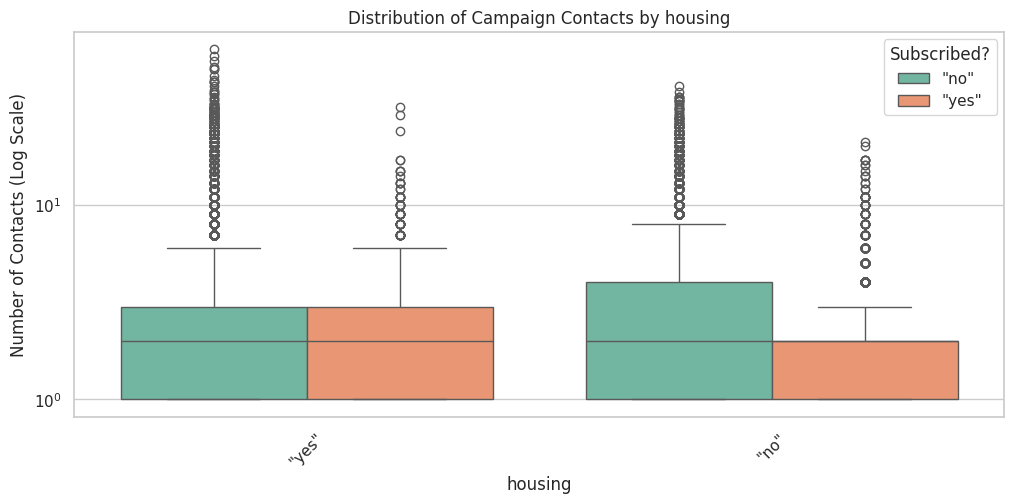

------------------------------

--- Analysis for: loan ---
           mean  median       std  count
loan                                    
"yes"  2.834622     2.0  3.334578   7244
"no"   2.750336     2.0  3.050664  37967


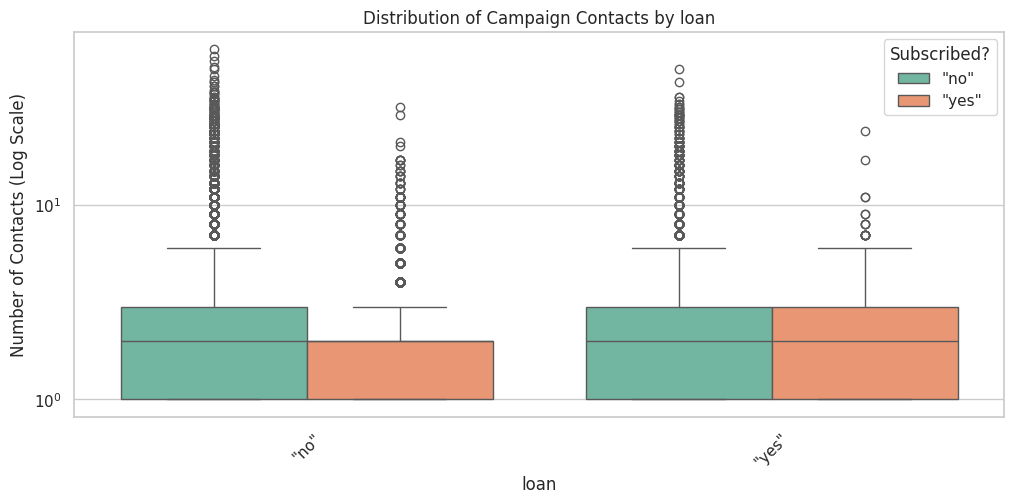

------------------------------

--- Analysis for: contact ---
                 mean  median       std  count
contact                                       
"telephone"  3.400895     2.0  3.623406   2906
"cellular"   2.690114     2.0  2.900720  29285


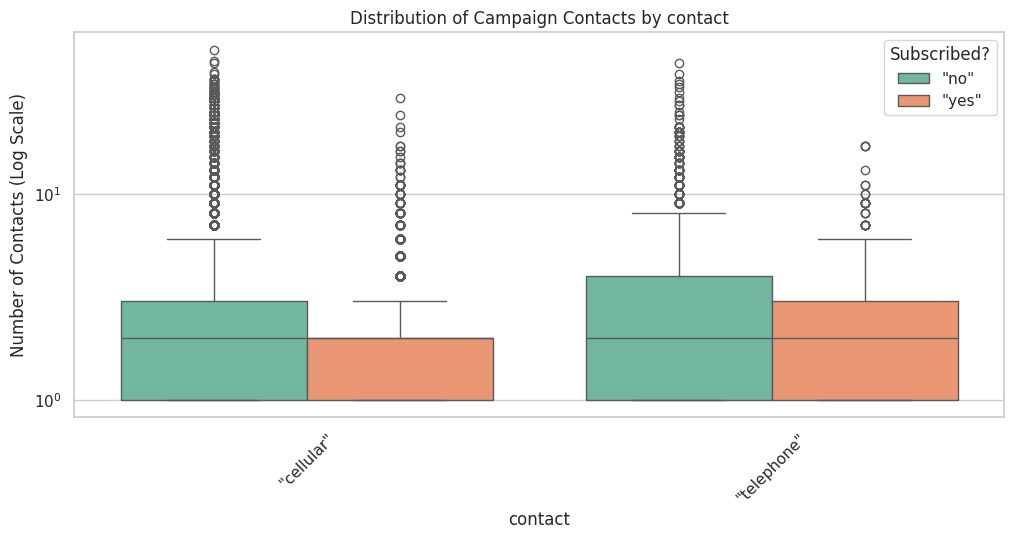

------------------------------

--- Analysis for: month ---
           mean  median       std  count
month                                   
"aug"  3.927325     3.0  3.762757   6247
"jul"  3.524438     2.0  4.268947   6895
"jun"  3.135368     2.0  3.912362   5341
"may"  2.447552     2.0  2.474889  13766
"feb"  2.382031     2.0  2.031417   2649
"mar"  2.205451     2.0  2.083280    477
"dec"  2.196262     2.0  1.612389    214
"apr"  1.955321     1.5  1.474582   2932
"nov"  1.918136     1.0  1.387087   3970
"sep"  1.765112     1.0  1.337544    579
"jan"  1.672131     1.0  0.974416   1403
"oct"  1.536585     1.0  0.897390    738


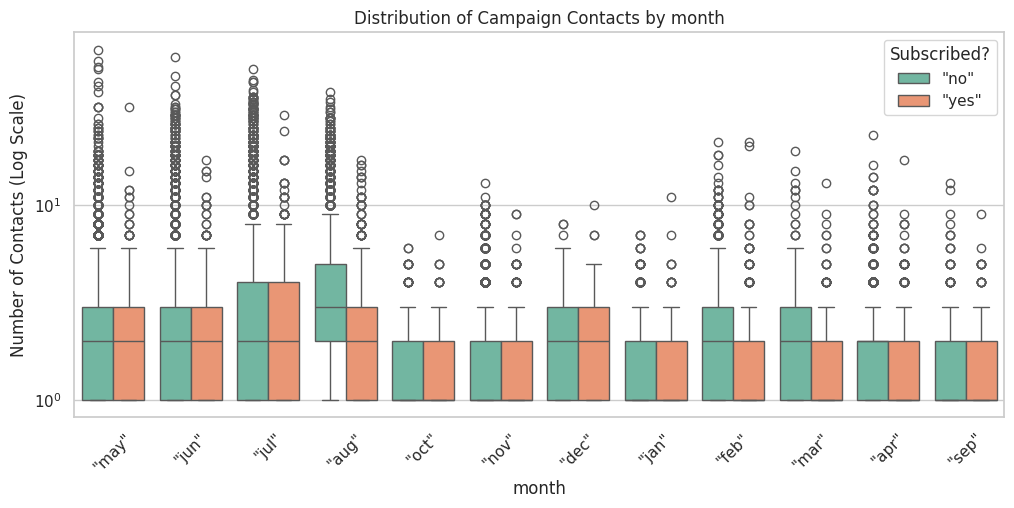

------------------------------

--- Analysis for: poutcome ---
               mean  median       std  count
poutcome                                    
"other"    2.461413     2.0  1.902641   1840
"failure"  1.980820     1.0  1.470818   4901
"success"  1.806089     1.0  1.269141   1511


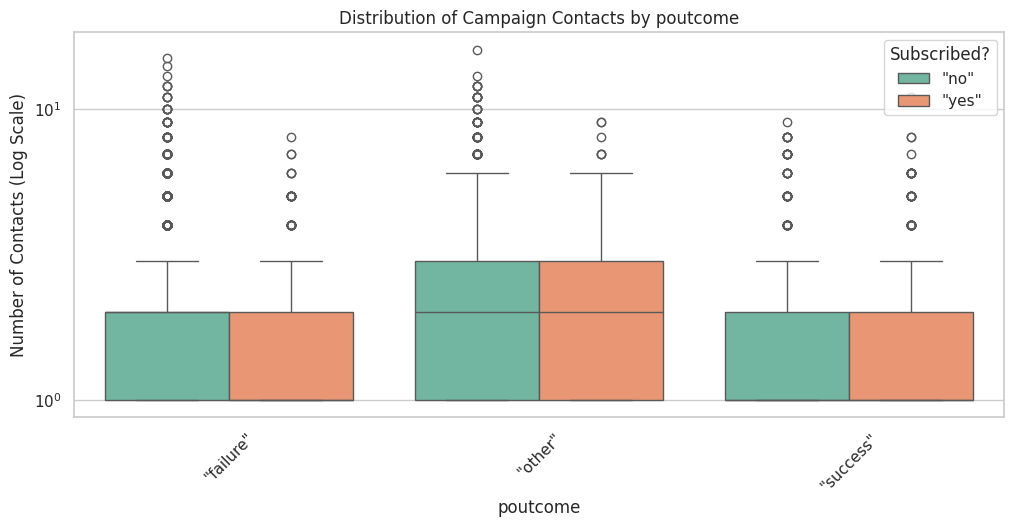

------------------------------

--- Analysis for: term_deposit ---
                  mean  median       std  count
term_deposit                                   
"no"          2.846350     2.0  3.212767  39922
"yes"         2.141047     2.0  1.921826   5289


/tmp/ipython-input-4015235934.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Subscribed?', loc='upper right')


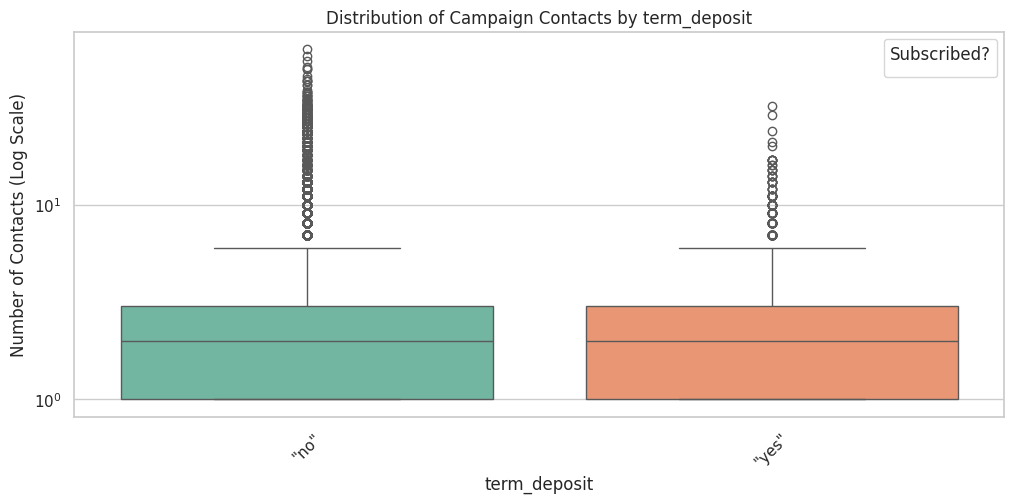

------------------------------


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the visual style
sns.set_theme(style="whitegrid")

for col in categorical_cols:
    print(f"\n--- Analysis for: {col} ---")

    # 1. Calculate Summary Statistics
    # This shows the average number of contacts per category
    summary = bank.groupby(col)['campaign'].agg(['mean', 'median', 'std', 'count']).sort_values(by='mean', ascending=False)
    print(summary)

    # 2. Generate Visualization
    plt.figure(figsize=(12, 5))

    # Using 'hue' with your target variable (term_deposit/y)
    # to see if successful campaigns look different from unsuccessful ones
    sns.boxplot(data=bank, x=col, y='campaign', hue='term_deposit', palette="Set2")

    plt.title(f'Distribution of Campaign Contacts by {col}')
    plt.xticks(rotation=45)
    plt.yscale('log') # Using log scale because 'campaign' often has high outliers
    plt.ylabel('Number of Contacts (Log Scale)')
    plt.legend(title='Subscribed?', loc='upper right')
    plt.show()

    print("-" * 30)

## Experimenting with Attribute Combinations

In [ ]:
bank["balance_per_age"] = bank["balance"] / bank["age"]
bank["duration_per_campaign"] = bank["duration"] / bank["campaign"]
bank["previous_per_campaign"] = bank["previous"].replace(-1, 0) / bank["campaign"]

# Prepare the Training Data for Machine Learning Algorithms

## General Data Cleaning

In [ ]:
bank.isnull().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day,0


In [ ]:
#handling null values for poutcome

bank_option1 = bank.copy()

bank_option1.dropna(subset=["poutcome"], inplace=True)  # option 1a

bank_option1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit,balance_per_age,duration_per_campaign,previous_per_campaign
24060,33,"""admin.""","""married""","""tertiary""","""no""",882,"""no""","""no""","""telephone""",21,"""oct""",39,1,151,3,"""failure""","""no""",26.727273,39.0,3.0
24062,42,"""admin.""","""single""","""secondary""","""no""",-247,"""yes""","""yes""","""telephone""",21,"""oct""",519,1,166,1,"""other""","""yes""",-5.880952,519.0,1.0
24064,33,"""services""","""married""","""secondary""","""no""",3444,"""yes""","""no""","""telephone""",21,"""oct""",144,1,91,4,"""failure""","""yes""",104.363636,144.0,4.0
24072,36,"""management""","""married""","""tertiary""","""no""",2415,"""yes""","""no""","""telephone""",22,"""oct""",73,1,86,4,"""other""","""no""",67.083333,73.0,4.0
24077,36,"""management""","""married""","""tertiary""","""no""",0,"""yes""","""no""","""telephone""",23,"""oct""",140,1,143,3,"""failure""","""yes""",0.000000,140.0,3.0


In [ ]:
bank_option1.shape

(8252, 20)

In [ ]:
bank_option2 = bank.copy()

bank_option2.drop("poutcome", axis=1, inplace=True)  # option 1b

bank_option2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,term_deposit,balance_per_age,duration_per_campaign,previous_per_campaign
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""",NaN,5,"""may""",261,1,-1,0,"""no""",36.948276,261.0,0.0
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""",NaN,5,"""may""",151,1,-1,0,"""no""",0.659091,151.0,0.0
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""",NaN,5,"""may""",76,1,-1,0,"""no""",0.060606,76.0,0.0
3,47,"""blue-collar""","""married""",NaN,"""no""",1506,"""yes""","""no""",NaN,5,"""may""",92,1,-1,0,"""no""",32.042553,92.0,0.0
4,33,NaN,"""single""",NaN,"""no""",1,"""no""","""no""",NaN,5,"""may""",198,1,-1,0,"""no""",0.030303,198.0,0.0


In [ ]:
bank_option2.shape

(45211, 19)

In [ ]:
#handling null values for contact column

bank_option3 = bank.copy()

bank_option3.dropna(subset=["contact"], inplace=True)  # option 2a

bank_option3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit,balance_per_age,duration_per_campaign,previous_per_campaign
12657,27,"""management""","""single""","""secondary""","""no""",35,"""no""","""no""","""cellular""",4,"""jul""",255,1,-1,0,NaN,"""no""",1.296296,255.0,0.0
12658,54,"""blue-collar""","""married""","""primary""","""no""",466,"""no""","""no""","""cellular""",4,"""jul""",297,1,-1,0,NaN,"""no""",8.629630,297.0,0.0
12659,43,"""blue-collar""","""married""","""secondary""","""no""",105,"""no""","""yes""","""cellular""",4,"""jul""",668,2,-1,0,NaN,"""no""",2.441860,334.0,0.0
12660,31,"""technician""","""single""","""secondary""","""no""",19,"""no""","""no""","""telephone""",4,"""jul""",65,2,-1,0,NaN,"""no""",0.612903,32.5,0.0
12661,27,"""technician""","""single""","""secondary""","""no""",126,"""yes""","""yes""","""cellular""",4,"""jul""",436,4,-1,0,NaN,"""no""",4.666667,109.0,0.0


In [ ]:
bank_option3.shape

(32191, 20)

In [ ]:
bank_option4 = bank.copy()

bank_option4.drop("contact", axis=1, inplace=True)  # option 2b

bank_option4.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,term_deposit,balance_per_age,duration_per_campaign,previous_per_campaign
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""",5,"""may""",261,1,-1,0,NaN,"""no""",36.948276,261.0,0.0
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""",5,"""may""",151,1,-1,0,NaN,"""no""",0.659091,151.0,0.0
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""",5,"""may""",76,1,-1,0,NaN,"""no""",0.060606,76.0,0.0
3,47,"""blue-collar""","""married""",NaN,"""no""",1506,"""yes""","""no""",5,"""may""",92,1,-1,0,NaN,"""no""",32.042553,92.0,0.0
4,33,NaN,"""single""",NaN,"""no""",1,"""no""","""no""",5,"""may""",198,1,-1,0,NaN,"""no""",0.030303,198.0,0.0


In [ ]:
bank_option4.shape

(45211, 19)

In [ ]:
# Create a copy of the banking DataFrame to apply changes
banking = bank.copy()

# Drop rows where 'job', 'poutcome' or 'education' columns have NaN values
banking.dropna(subset=['job', 'education', 'poutcome', 'contact'], inplace=True)

print(f"Original banking DataFrame shape: {bank.shape}")
print(f"New banking DataFrame shape: {banking.shape}")

Original banking DataFrame shape: (45211, 20)
New banking DataFrame shape: (7842, 20)


In [ ]:
banking.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit,balance_per_age,duration_per_campaign,previous_per_campaign
24060,33,"""admin.""","""married""","""tertiary""","""no""",882,"""no""","""no""","""telephone""",21,"""oct""",39,1,151,3,"""failure""","""no""",26.727273,39.0,3.0
24062,42,"""admin.""","""single""","""secondary""","""no""",-247,"""yes""","""yes""","""telephone""",21,"""oct""",519,1,166,1,"""other""","""yes""",-5.880952,519.0,1.0
24064,33,"""services""","""married""","""secondary""","""no""",3444,"""yes""","""no""","""telephone""",21,"""oct""",144,1,91,4,"""failure""","""yes""",104.363636,144.0,4.0
24072,36,"""management""","""married""","""tertiary""","""no""",2415,"""yes""","""no""","""telephone""",22,"""oct""",73,1,86,4,"""other""","""no""",67.083333,73.0,4.0
24077,36,"""management""","""married""","""tertiary""","""no""",0,"""yes""","""no""","""telephone""",23,"""oct""",140,1,143,3,"""failure""","""yes""",0.000000,140.0,3.0


In [ ]:
banking.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


## Create a Test Set

In [ ]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = shuffle_and_split_data(banking, 0.2)
len(train_set)

6274

In [ ]:
len(test_set)

1568

To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:

In [ ]:
np.random.seed(42)

In [ ]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [ ]:
bank_with_id = banking.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(bank_with_id, 0.2, "index")

In [ ]:
from sklearn.model_selection import train_test_split

# Creating a binned version of the 'campaign' column for stratification
# Based on bank.describe(), campaign values range from 1 to 63, with many small values.
bins = [0, 1, 2, 3, 5, 10, 20, np.inf]
labels = ['1', '2', '3', '4-5', '6-10', '11-20', '21+']

banking['campaign_binned'] = pd.cut(banking['campaign'], bins=bins, labels=labels, right=True, include_lowest=True)

# First split: 80% for training+validation, 20% for test
# Using the binned campaign column for stratification
train_val_set, test_set = train_test_split(banking, test_size=0.2, random_state=42, stratify=banking['campaign_binned'])

# Second split: From the train_val_set, split 80% for training and 20% for validation
# Using the binned campaign column from train_val_set for stratification
train_set, validation_set = train_test_split(train_val_set, test_size=0.2, random_state=42, stratify=train_val_set['campaign_binned'])

print(f"Length of train set: {len(train_set)}")
print(f"Length of validation set: {len(validation_set)}")
print(f"Length of test set: {len(test_set)}")

# Calculate and display the proportions of the 'campaign_binned' column in the stratified sets
print(f"\nTrain set 'campaign_binned' proportions:\n{train_set['campaign_binned'].value_counts(normalize=True)}")
print(f"\nValidation set 'campaign_binned' proportions:\n{validation_set['campaign_binned'].value_counts(normalize=True)}")
print(f"\nTest set 'campaign_binned' proportions:\n{test_set['campaign_binned'].value_counts(normalize=True)}")

# Dropping the temporary binned column from all sets if it's not meant to be a feature in the model
train_set = train_set.drop('campaign_binned', axis=1)
validation_set = validation_set.drop('campaign_binned', axis=1)
test_set = test_set.drop('campaign_binned', axis=1)

Length of train set: 5018
Length of validation set: 1255
Length of test set: 1569

Train set 'campaign_binned' proportions:
campaign_binned
1        0.482463
2        0.277999
3        0.111000
4-5      0.083300
6-10     0.042447
11-20    0.002790
21+      0.000000
Name: proportion, dtype: float64

Validation set 'campaign_binned' proportions:
campaign_binned
1        0.482869
2        0.278088
3        0.110757
4-5      0.082869
6-10     0.042231
11-20    0.003187
21+      0.000000
Name: proportion, dtype: float64

Test set 'campaign_binned' proportions:
campaign_binned
1        0.482473
2        0.277884
3        0.110899
4-5      0.083493
6-10     0.042065
11-20    0.003187
21+      0.000000
Name: proportion, dtype: float64


# Select and Train a Model

## Training and Evaluating on the Training Set

In [ ]:
# The 'term_deposit' column is an outcome and will not be used as a feature to predict 'campaign'.
# We will use the entire train_set for regression, not just successful campaigns.

# Define numerical and categorical features
numeric_features = ["age", "balance", "pdays", "previous"]
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] # All original categorical cols

# Combine all features for the input DataFrame
all_features = numeric_features + categorical_features

banking_target = train_set["campaign"].copy()
banking_features = train_set[all_features].copy()

# Final cleaning: Handle 'pdays' -1 values
banking_features["pdays"] = banking_features["pdays"].replace(-1, 999)

print("Target and features defined for regression task (all clients).")
print(f"New target (first 5 rows):\n{banking_target.head()}")
print(f"New feature set (first 5 rows):\n{banking_features.head()}")

Target and features defined for regression task (all clients).
New target (first 5 rows):
45138    1
29156    1
44216    2
35233    1
42185    2
Name: campaign, dtype: int64
New feature set (first 5 rows):
       age  balance  pdays  previous           job     marital    education  \
45138   30      500    543         3  "technician"    "single"  "secondary"   
29156   40      504    266         1  "technician"   "married"  "secondary"   
44216   36      649     91         1  "management"  "divorced"   "tertiary"   
35233   27     -211    349         3  "technician"    "single"  "secondary"   
42185   47     3940     96         5   "housemaid"   "married"  "secondary"   

      default housing  loan     contact  month   poutcome  
45138    "no"   "yes"  "no"  "cellular"  "nov"  "failure"  
29156    "no"   "yes"  "no"  "cellular"  "feb"  "failure"  
44216    "no"    "no"  "no"  "cellular"  "jul"  "failure"  
35233    "no"   "yes"  "no"  "cellular"  "may"  "failure"  
42185    "no"   "ye

## Preprocessing Pipeline

In [ ]:
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify numerical and categorical columns from the modified banking_features
# Now, banking_features should contain both numerical (int/float) and object (categorical) types
numerical_cols_for_pipeline = banking_features.select_dtypes(include=np.number).columns.tolist()
categorical_cols_for_pipeline = banking_features.select_dtypes(include='object').columns.tolist()

# Pipeline for numerical columns: impute and standardize
basic_num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

# Pipeline for categorical columns: impute with most frequent and one-hot encode
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(drop='first', sparse_output=False)
)

# Create the final preprocessing pipeline for the regression task
final_preprocessing = make_column_transformer(
    (basic_num_pipeline, numerical_cols_for_pipeline),
    (cat_pipeline, categorical_cols_for_pipeline)
)

print("Updated preprocessing pipeline (final_preprocessing) has been constructed for the regression task.")

Updated preprocessing pipeline (final_preprocessing) has been constructed for the regression task.


In [ ]:
banking_prepared_for_regression = final_preprocessing.fit_transform(banking_features)

# Get feature names after preprocessing
feature_names_out_regression = final_preprocessing.get_feature_names_out()
banking_prepared_df_regression = pd.DataFrame(
    banking_prepared_for_regression,
    columns=feature_names_out_regression
)

print("Shape of the prepared DataFrame for regression:", banking_prepared_df_regression.shape)
print("\nFirst 5 rows of the prepared DataFrame for regression:")
display(banking_prepared_df_regression.head())

Shape of the prepared DataFrame for regression: (5018, 35)

First 5 rows of the prepared DataFrame for regression:


,pipeline-1__age,pipeline-1__balance,pipeline-1__pdays,pipeline-1__previous,"pipeline-2__job_""blue-collar""","pipeline-2__job_""entrepreneur""","pipeline-2__job_""housemaid""","pipeline-2__job_""management""","pipeline-2__job_""retired""","pipeline-2__job_""self-employed""",...,"pipeline-2__month_""jan""","pipeline-2__month_""jul""","pipeline-2__month_""jun""","pipeline-2__month_""mar""","pipeline-2__month_""may""","pipeline-2__month_""nov""","pipeline-2__month_""oct""","pipeline-2__month_""sep""","pipeline-2__poutcome_""other""","pipeline-2__poutcome_""success"""
0,-0.956040,-0.331258,2.895541,-0.050842,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.068502,-0.330030,0.399724,-0.620322,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.423517,-0.285482,-1.177055,-0.620322,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.222301,-0.549693,1.147568,-0.050842,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.552774,0.725582,-1.132004,0.518637,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
#Checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. We check VIF on the prepared feature DataFrame
X = banking_prepared_df_regression

# 2. Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# 3. Sort by highest VIF to see the "problem" variables
print(vif_data.sort_values(by="VIF", ascending=False).head(10))

                              feature       VIF
17   pipeline-2__education_"tertiary"  4.929374
14      pipeline-2__marital_"married"  4.924805
16  pipeline-2__education_"secondary"  4.461087
15       pipeline-2__marital_"single"  3.590875
19          pipeline-2__housing_"yes"  3.472071
7        pipeline-2__job_"management"  3.459045
29            pipeline-2__month_"may"  2.849764
4       pipeline-2__job_"blue-collar"  2.232113
12       pipeline-2__job_"technician"  2.129954
30            pipeline-2__month_"nov"  2.022655


##Model Testing & Final Selections

####**Linear Regression**



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score

# Initialize Linear Regression model
lin_reg_regression = LinearRegression()

# Train the model
lin_reg_regression.fit(banking_prepared_df_regression, banking_target)

# Make predictions on the training set
banking_predictions_reg = lin_reg_regression.predict(banking_prepared_df_regression)

# Evaluate Linear Regression model on the training set
rmse_lin_reg = root_mean_squared_error(banking_target, banking_predictions_reg)
print(f"\nLinear Regression Training RMSE: {rmse_lin_reg:.4f}")

# Evaluate Linear Regression using cross-validation with RMSE score
lin_reg_rmse_scores = cross_val_score(lin_reg_regression, banking_prepared_df_regression, banking_target,
                                     scoring="neg_root_mean_squared_error", cv=10)

# Convert negative RMSE scores to positive
lin_reg_rmse_scores = -lin_reg_rmse_scores

print("\nLinear Regression Cross-Validation RMSE Scores:")
print(lin_reg_rmse_scores)

import pandas as pd
print("\nLinear Regression Cross-Validation RMSE Statistics:")
print(pd.Series(lin_reg_rmse_scores).describe())


Linear Regression Training RMSE: 1.5104

Linear Regression Cross-Validation RMSE Scores:
[1.42212532 1.33015776 1.52686125 1.63702372 1.61186624 1.61715387
 1.65940983 1.48372791 1.5145748  1.36941914]

Linear Regression Cross-Validation RMSE Statistics:
count    10.000000
mean      1.517232
std       0.115767
min       1.330158
25%       1.437526
50%       1.520718
75%       1.615832
max       1.659410
dtype: float64


In [ ]:
#first let's try to understand issues with outliers

# 1. Transform the target to log scale
# log1p is used to handle 1 + x to avoid log(0)
banking_target_log = np.log1p(banking_target)

# 2. Re-train the Linear Regression on the LOG target
lin_reg_log = LinearRegression()
lin_reg_log.fit(banking_prepared_df_regression, banking_target_log)

# 3. Make predictions (these will be in log scale)
log_predictions = lin_reg_log.predict(banking_prepared_df_regression)

# 4. Convert predictions BACK to original scale to calculate true RMSE
# expm1 is the inverse of log1p
final_predictions = np.expm1(log_predictions)

# 5. Evaluate
rmse_log_transformed = root_mean_squared_error(banking_target, final_predictions)
print(f"New RMSE after Log Transformation: {rmse_log_transformed:.4f}")

New RMSE after Log Transformation: 1.5375


**Quick insights**

RMSE got worse even after adjusting with log transform.

Next step would be to clip the campaign data to focus on the "effective" number of calls as seen in the boxplot.

Box plots show that almost all successful "yes" outcomes are captured at a maximum of 10. I'll force any campaign value above 10 to be exactly 10 in the training data.

This will remove the penalty from the 50-call outliers as they can be assumed to be 'noise' or persistency from the sales team.

In [ ]:
# Capping the campaign target at 10
banking_target_clipped = np.clip(banking_target, a_min=None, a_max=10)

# Re-training the Linear Regression on the clipped target
lin_reg_clipped = LinearRegression()
lin_reg_clipped.fit(banking_prepared_df_regression, banking_target_clipped)

clipped_predictions = lin_reg_clipped.predict(banking_prepared_df_regression)

# Evaluating against the clipped target
rmse_clipped = root_mean_squared_error(banking_target_clipped, clipped_predictions)

print(f"RMSE after Clipping at 10 contacts: {rmse_clipped:.4f}")

print(f"Prediction Range: {clipped_predictions.min():.2f} to {clipped_predictions.max():.2f}")

RMSE after Clipping at 10 contacts: 1.4757
Prediction Range: 1.04 to 6.81


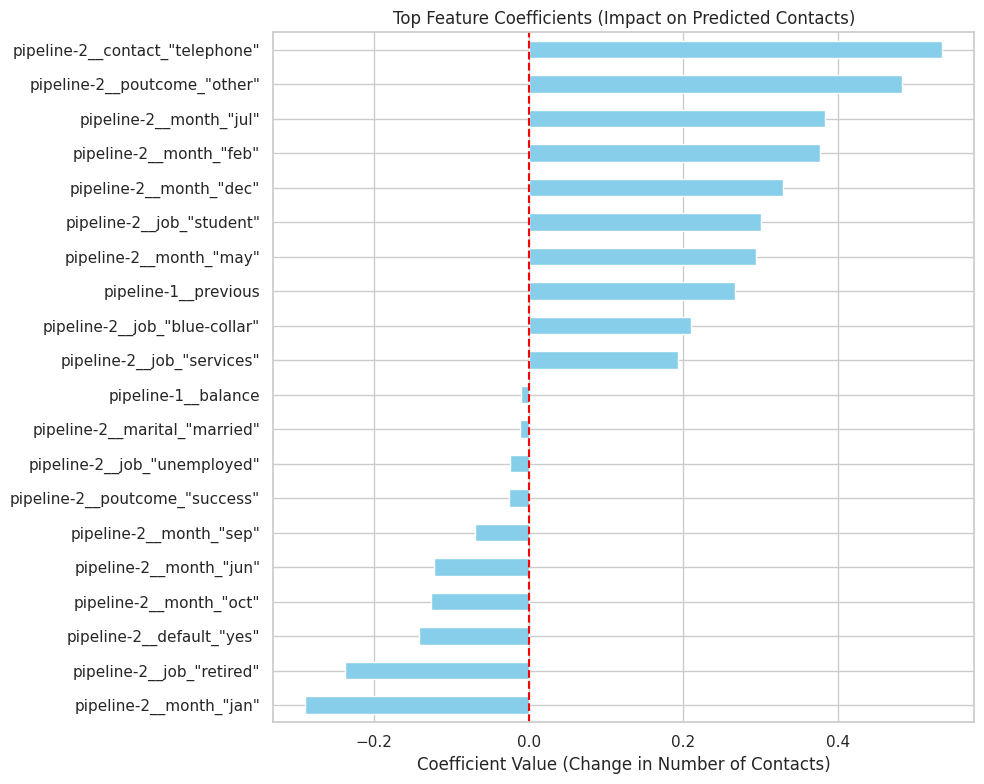

Coefficients:
pipeline-2__month_"jan"             -0.289054
pipeline-2__job_"retired"           -0.237340
pipeline-2__default_"yes"           -0.142280
pipeline-2__month_"oct"             -0.126094
pipeline-2__month_"jun"             -0.121948
pipeline-2__month_"sep"             -0.069828
pipeline-2__poutcome_"success"      -0.025438
pipeline-2__job_"unemployed"        -0.024382
pipeline-2__marital_"married"       -0.011277
pipeline-1__balance                 -0.009918
pipeline-2__loan_"yes"              -0.009736
pipeline-2__job_"self-employed"     -0.008596
pipeline-2__marital_"single"         0.003469
pipeline-2__month_"aug"              0.008834
pipeline-2__housing_"yes"            0.033417
pipeline-1__pdays                    0.034140
pipeline-2__month_"nov"              0.043301
pipeline-2__month_"mar"              0.056236
pipeline-1__age                      0.065991
pipeline-2__education_"secondary"    0.074954
pipeline-2__job_"management"         0.118679
pipeline-2__job_"hou

In [ ]:
# Create a Series mapping feature names to their coefficients
# We use the clipped model since it's the most stable version you've run
coeffs = pd.Series(lin_reg_clipped.coef_, index=feature_names_out_regression)

# Sort them to see the strongest predictors
# Positive values increase the predicted contact count; negative values decrease it.
sorted_coeffs = coeffs.sort_values()

# Plot the Top 10 and Bottom 10 for clarity
top_bottom_coeffs = pd.concat([sorted_coeffs.head(10), sorted_coeffs.tail(10)])

plt.figure(figsize=(10, 8))
top_bottom_coeffs.plot(kind='barh', color='skyblue')
plt.title('Top Feature Coefficients (Impact on Predicted Contacts)')
plt.xlabel('Coefficient Value (Change in Number of Contacts)')
plt.axvline(x=0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

# 4. Display the raw numbers
print("Coefficients:")
print(sorted_coeffs)

#Key Takeaways

1. The model never predicts more than approximately **7** calls. This is the data-driven justification for a "Hard Cap." If a lead hasn't converted by call #7, the model literally cannot find a reason to keep calling. There is no evidence in the data that calling a customer 20+ times increases the likelihood of a subscription; which reveals operational waste.

2. Across almost all demographic segments (job, marital status, education), successful conversions ("yes") typically occur within the first 2 contacts. Even if the RMSE is high, also knowing that a "Student" could require fewer calls than a "Management" lead.

While the model isn't overtly overfitting, its predictive accuracy, as indicated by the RMSE, isn't particularly strong (depending on the cost of a single sales call personnel) for this task. This suggests that a more complex model, capable of capturing non-linear relationships or better handling count data, might yield improved results. We'll explore other models like Random Forest Regressor in a different iteration, which often performs better on such datasets.

####**Default Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import root_mean_squared_error

# Initialize the Random Forest Regressor
# We set random_state for reproducibility
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Training the model on  clipped target
rf_reg.fit(banking_prepared_df_regression, banking_target_clipped)

# Evaluating the training set
rf_train_preds = rf_reg.predict(banking_prepared_df_regression)
rmse_rf_train = root_mean_squared_error(banking_target_clipped, rf_train_preds)

# Performing 10-Fold Cross-Validation
rf_cv_scores = cross_val_score(
    rf_reg,
    banking_prepared_df_regression,
    banking_target_clipped,
    scoring="neg_root_mean_squared_error",
    cv=10
)

# Convert negative scores to positive RMSE
rf_rmse_cv_scores = -rf_cv_scores

# 5. Output Results
print(f"Random Forest Training RMSE: {rmse_rf_train:.4f}")
print(f"\nRandom Forest Cross-Validation RMSE Mean: {rf_rmse_cv_scores.mean():.4f}")
print(f"Random Forest Cross-Validation RMSE Std Dev: {rf_rmse_cv_scores.std():.4f}")

# Compare to your previous Linear Regression mean (1.5172)
print(f"\nImprovement over Linear Regression: {1.5172 - rf_rmse_cv_scores.mean():.4f}")

Random Forest Training RMSE: 1.1217

Random Forest Cross-Validation RMSE Mean: 1.5000
Random Forest Cross-Validation RMSE Std Dev: 0.0943

Improvement over Linear Regression: 0.0172


**Quick Insight**: This confirms that "Number of Contacts" is highly stochastic.

It seems that even with a complex non-linear model, demographic data (age, job, marital status) can only explain so much of a salesperson's behavior or a customer's receptivity.

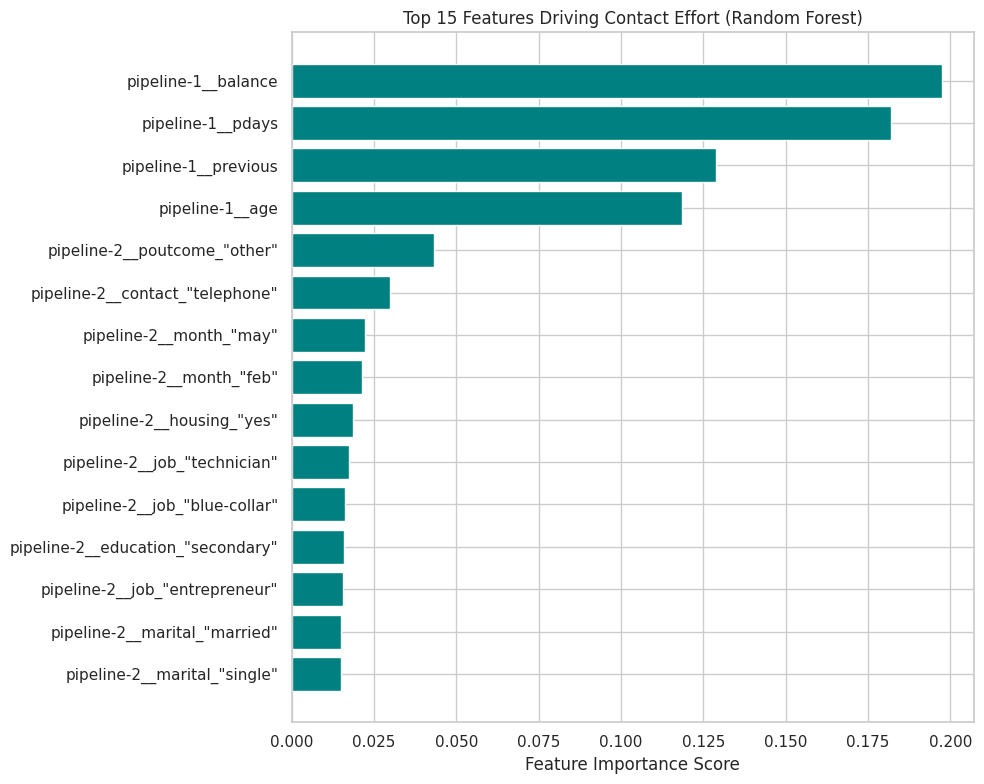

                            Feature  Importance
1               pipeline-1__balance    0.197309
2                 pipeline-1__pdays    0.181870
3              pipeline-1__previous    0.128893
0                   pipeline-1__age    0.118617
33     pipeline-2__poutcome_"other"    0.043162
21  pipeline-2__contact_"telephone"    0.029773
29          pipeline-2__month_"may"    0.022181
24          pipeline-2__month_"feb"    0.021219
19        pipeline-2__housing_"yes"    0.018514
12     pipeline-2__job_"technician"    0.017327


In [ ]:
# Extracting importance and match with feature names
importances = rf_reg.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names_out_regression,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the Top 15
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'].head(15), feature_importance_df['Importance'].head(15), color='teal')
plt.gca().invert_yaxis()
plt.title('Top 15 Features Driving Contact Effort (Random Forest)')
plt.xlabel('Feature Importance Score')
plt.tight_layout()
plt.show()

# Print the top drivers for your report
print(feature_importance_df.head(10))

**Quick Insights**:

1. While the Linear Regression focused on categorical "shifters" like months and jobs, the Random Forest has discovered that the continuous, numerical variables are the true drivers of campaign effort. On the other hand, we still see that using landlines is the highest-ranked categorical feature for effort. The dataset is based on 2008 data so this tracks with changes in modern marketing.

2. Both pdays (days since last contact) and previous (number of past contacts) are in the top 3. This means that the history of the relationship is a much stronger predictor of how much effort the bank will need today than the customer's current job or marital status. So, the recommendation is to prioritize leads based on the "Recency" and "Frequency" of previous interactions.

####**RandomizedSearchCV Forest Regressor**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Defining the 'Parameter Grid'
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 10],
    'max_features': ['sqrt', 'log2', None] # Number of features at each split
}

# Initializing the Randomized Search
rnd_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

rnd_search.fit(banking_prepared_df_regression, banking_target_clipped)

print(f"Best Parameters: {rnd_search.best_params_}")
print(f"Best CV RMSE: {-rnd_search.best_score_:.4f}")

final_model = rnd_search.best_estimator_

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}
Best CV RMSE: 1.4794


**Final Recommendation**:

1. Use the Random Forest's logic to segment campaign effort by Account Balance and Age tiers rather than just job titles.

2. Regardless of the model, predictions rarely exceed 7 calls. Implement a 7-call limit to eliminate the "Persistence Trap".

3. Target the "Efficiency All-Stars" (January leads and Retired segments) identified by the linear coefficients to maximize conversions.